In [2]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#承接flare_4_x_lya_final_2
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time_change_1.csv')
sheet_time_diff=pd.read_csv('x_time_diff.csv')
sheet_x_value=pd.read_csv('x_start_value.csv')

In [2]:
sheet_xrs_time

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,CLASS,SS,SIGN
0,0,1,9-04-2010,04:44:00,04:55:00,05:02:00,B3.7,N24E01 11060,1
1,83,84,9-06-2010,08:39:00,08:46:00,08:53:00,B2.5,11078,1
2,239,240,31-07-2010,05:15:00,05:29:00,05:32:00,B4.8,N10E41 11092,1
3,526,527,19-10-2010,13:19:00,13:24:00,13:29:00,B5.1,11113,1
4,549,550,23-10-2010,17:29:00,17:38:00,17:44:00,B3.6,S30W32 11115,1
...,...,...,...,...,...,...,...,...,...
95,11880,11881,15-04-2016,06:14:00,06:26:00,06:34:00,B7.7,N09W12 12529,1
96,11923,11924,26-04-2016,04:01:00,04:07:00,04:10:00,B4.9,12536,1
97,11932,11933,27-04-2016,00:03:00,00:08:00,00:11:00,B4.3,N13E53 12536,1
98,12070,12071,25-05-2016,01:59:00,02:03:00,02:06:00,B3.8,S11W56 12546,1


31  39  72

In [3]:
sheet_xrs_time_new=sheet_xrs_time.drop(index=[31,39,72]) #删除指定行
sheet_lya_time_new=sheet_lya_time.drop(index=[31,39,72])
sheet_time_diff_new=sheet_time_diff.drop(index=[31,39])
sheet_x_value_new=sheet_x_value.drop(index=[31,39])


sheet_xrs_time_new=sheet_xrs_time_new.reset_index(drop=True) #重置索引
sheet_lya_time_new=sheet_lya_time_new.reset_index(drop=True) #重置索引
sheet_time_diff_new=sheet_time_diff_new.reset_index(drop=True) #重置索引
sheet_x_value_new=sheet_x_value_new.reset_index(drop=True) #重置索引

In [4]:
#iloc是位置索引，他括号里排序是按位置，删掉某个元素，位置序号也变，但序列号不变，用loc的话只能读序列号

#sheet_lya_time_new.loc[99]
#sheet_lya_time_new.iloc[96]
#上面这两个等价

In [4]:
sheet_lya_time_new

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,1.5752,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0
1,1,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,1.0426,B2.5,1,2.500000e-07,0.000063,1.010428,256,1,0
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,0.9599,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,0.8663,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,0.8334,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,95,2012,2016-04-15,06:22:24,06:30:15,06:41:10,18.8,6.9429,7.0091,6.9429,0.9543,B7.7,1,7.700000e-07,0.000066,1.009535,255,1,0
93,96,2017,2016-04-26,04:01:56,04:07:04,04:14:53,12.9,6.6968,6.7720,6.7056,0.9896,B4.9,1,4.900000e-07,0.000066,1.009902,4,2,0
94,97,2018,2016-04-27,00:05:49,00:08:00,00:29:18,23.5,6.7285,6.7949,6.7064,0.9864,B4.3,1,4.300000e-07,0.000066,1.009868,-15,2,0
95,98,2033,2016-05-25,01:54:30,02:01:04,02:21:39,27.1,6.7370,6.8125,6.7281,1.1209,B3.8,1,3.800000e-07,0.000076,1.011207,-116,0,0


In [4]:
sheet3_diff_t_d= pd.DataFrame() #记录导数峰值差
sheet3_sub_x= pd.DataFrame() #记录减掉背景x值
for  i in range(97):

    a=sheet_lya_time_new.iloc[i][4]
    b_time=int(a[0:2])*3600+int(a[3:5])*60+int(a[6:8])
    c_time=sheet_time_diff_new.iloc[i][1]
    sheet3_diff_t_d.loc[i,'diff_t_d']=b_time-c_time
    
    sheet3_sub_x.loc[i,'x_sub']=sheet_lya_time_new.iloc[i][13]-sheet_x_value_new.iloc[i][1] #减去背景值
#合并dataframe
sheet_lya_time_new = pd.concat([sheet_lya_time_new,sheet3_diff_t_d],axis=1,ignore_index=False)
sheet_lya_time_new = pd.concat([sheet_lya_time_new,sheet3_sub_x],axis=1,ignore_index=False)

In [5]:
sheet_lya_time_new.iloc[0][13]

3.7e-07

In [4]:
sheet_lya_time_new

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,diff_t_d,x_sub
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,...,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0,196.000,3.355164e-07
1,1,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,...,B2.5,1,2.500000e-07,0.000063,1.010428,256,1,0,289.000,1.667583e-07
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,...,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0,-4.000,2.992420e-07
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,...,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0,45.645,3.626000e-07
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,...,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,0,15.113,2.434000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,95,2012,2016-04-15,06:22:24,06:30:15,06:41:10,18.8,6.9429,7.0091,6.9429,...,B7.7,1,7.700000e-07,0.000066,1.009535,255,1,0,280.913,3.452000e-07
93,96,2017,2016-04-26,04:01:56,04:07:04,04:14:53,12.9,6.6968,6.7720,6.7056,...,B4.9,1,4.900000e-07,0.000066,1.009902,4,2,0,109.150,3.458800e-07
94,97,2018,2016-04-27,00:05:49,00:08:00,00:29:18,23.5,6.7285,6.7949,6.7064,...,B4.3,1,4.300000e-07,0.000066,1.009868,-15,2,0,97.023,2.124300e-07
95,98,2033,2016-05-25,01:54:30,02:01:04,02:21:39,27.1,6.7370,6.8125,6.7281,...,B3.8,1,3.800000e-07,0.000076,1.011207,-116,0,0,16.110,2.044100e-07


In [6]:
sheet_lya_time_new.head(50)

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,0,0
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,...,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0,196.000,3.355164e-07
1,1,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,...,B2.5,1,2.500000e-07,0.000063,1.010428,256,1,0,289.000,1.667583e-07
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,...,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0,-4.000,2.992420e-07
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,...,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0,45.645,3.626000e-07
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,...,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,0,15.113,2.434000e-07
5,5,33,2010-10-26,03:13:04,03:15:03,03:57:19,44.2,6.7787,6.8351,6.6911,...,B6.3,1,6.300000e-07,0.000056,1.008320,-57,0,0,68.427,3.209300e-07
6,6,39,2010-11-10,16:33:01,16:38:17,16:47:46,14.7,6.7829,6.8552,6.7955,...,B9.0,1,9.000000e-07,0.000060,1.008785,-43,0,0,30.793,7.716200e-07
7,7,45,2010-11-16,02:58:48,03:07:32,03:21:34,22.8,6.8655,6.9568,6.8750,...,B3.8,1,3.800000e-07,0.000082,1.011898,332,1,0,371.130,1.860400e-07
8,8,52,2011-01-04,09:42:01,09:48:01,09:57:28,15.5,6.9986,7.0720,7.0114,...,B6.4,1,6.400000e-07,0.000061,1.008643,21,0,0,94.859,4.670300e-07
9,9,60,2011-01-26,22:02:45,22:10:24,22:20:14,17.5,6.4138,6.5037,6.4266,...,B3.2,1,3.200000e-07,0.000077,1.011997,34,0,0,284.953,2.545830e-07


In [7]:
sheet_lya_time_new

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,0,0
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,...,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,0,196.000,3.355164e-07
1,1,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,...,B2.5,1,2.500000e-07,0.000063,1.010428,256,1,0,289.000,1.667583e-07
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,...,B4.8,1,4.800000e-07,0.000061,1.009587,-57,0,0,-4.000,2.992420e-07
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,...,B5.1,1,5.100000e-07,0.000059,1.008652,-69,0,0,45.645,3.626000e-07
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,...,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,0,15.113,2.434000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,95,2012,2016-04-15,06:22:24,06:30:15,06:41:10,18.8,6.9429,7.0091,6.9429,...,B7.7,1,7.700000e-07,0.000066,1.009535,255,1,0,280.913,3.452000e-07
93,96,2017,2016-04-26,04:01:56,04:07:04,04:14:53,12.9,6.6968,6.7720,6.7056,...,B4.9,1,4.900000e-07,0.000066,1.009902,4,2,0,109.150,3.458800e-07
94,97,2018,2016-04-27,00:05:49,00:08:00,00:29:18,23.5,6.7285,6.7949,6.7064,...,B4.3,1,4.300000e-07,0.000066,1.009868,-15,2,0,97.023,2.124300e-07
95,98,2033,2016-05-25,01:54:30,02:01:04,02:21:39,27.1,6.7370,6.8125,6.7281,...,B3.8,1,3.800000e-07,0.000076,1.011207,-116,0,0,16.110,2.044100e-07


#参数axis=0表示上下合并，1表示左右合并，ignore_index=True表示忽略原来的索引
x=x.reset_index(drop=True) #重置索引
res = pd.concat([x,sheet3_diff_t_d],axis=1,ignore_index=False)


In [6]:
len(sheet_lya_time_new)

97

In [7]:
for i in range(len(sheet_lya_time_new['DATE'])): 
    t_d=int(sheet_lya_time_new['T_D'][i])
    if(t_d>10):
        sheet_lya_time_new.loc[i,('SIGN_2')]=3
    elif(t_d<-10):
        sheet_lya_time_new.loc[i,('SIGN_2')]=1
    elif (t_d>=-10) and (t_d<=10): #筛选峰值差小
        sheet_lya_time_new.loc[i,('SIGN_2')]=2
    print('分类完毕')
    #sheet_lya_time_new.loc[i,('DATE')]=sheet_lya_time_new['DATE'][i].split(' ')[0]  
    sheet_lya_time_new.loc[i,('YEAR')]=int(sheet_lya_time_new['DATE'][i][0:4])#将列表中的年份提取出来存储

分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕
分类完毕


In [8]:
#筛选出峰值时间差在一定范围内的耀斑
sheet_new_B_1=sheet_lya_time_new
sheet_new_B_1=sheet_lya_time_new[sheet_lya_time_new['SIGN_2'] == 1]
print(len(sheet_new_B_1))
sheet_new_B_1.head(50)

49


,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,diff_t_d,x_sub
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,...,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,2010,196.000,3.355164e-07
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,...,B4.8,1,4.800000e-07,0.000061,1.009587,-57,1,2010,-4.000,2.992420e-07
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,...,B5.1,1,5.100000e-07,0.000059,1.008652,-69,1,2010,45.645,3.626000e-07
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,...,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,2010,15.113,2.434000e-07
5,5,33,2010-10-26,03:13:04,03:15:03,03:57:19,44.2,6.7787,6.8351,6.6911,...,B6.3,1,6.300000e-07,0.000056,1.008320,-57,1,2010,68.427,3.209300e-07
6,6,39,2010-11-10,16:33:01,16:38:17,16:47:46,14.7,6.7829,6.8552,6.7955,...,B9.0,1,9.000000e-07,0.000060,1.008785,-43,1,2010,30.793,7.716200e-07
10,10,70,2011-02-11,21:40:18,21:42:06,21:57:13,16.9,6.8625,6.9302,6.8658,...,B5.0,1,5.000000e-07,0.000064,1.009380,-894,1,2011,-313.250,2.876800e-07
13,13,160,2011-03-29,00:28:33,00:30:34,00:43:40,15.1,7.4558,7.5406,7.4395,...,B8.6,1,8.600000e-07,0.000085,1.011374,-86,1,2011,44.070,3.984700e-07
16,16,202,2011-06-16,23:09:52,23:14:57,23:20:58,11.1,6.7654,6.8784,6.7754,...,B6.3,1,6.300000e-07,0.000103,1.015202,-103,1,2011,127.586,2.681600e-07
18,18,240,2011-09-07,18:22:42,18:26:52,18:31:59,9.3,7.0585,7.1534,7.0958,...,B9.1,1,9.100000e-07,0.000058,1.008117,-68,1,2011,0.500,3.383000e-07


In [9]:
#筛选出峰值时间差在一定范围内的耀斑
sheet_new_B_2=sheet_lya_time_new
sheet_new_B_2=sheet_lya_time_new[sheet_lya_time_new['SIGN_2'] == 2]
print(len(sheet_new_B_2))
sheet_new_B_2.head(50)

20


,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,diff_t_d,x_sub
14,14,162,2011-03-31,21:31:17,21:39:06,21:54:13,22.9,7.5492,7.6405,7.5427,...,B7.0,1,7.000000e-07,0.000091,1.012094,6,2,2011,57.750,2.647000e-07
17,17,230,2011-08-10,13:26:58,13:33:31,13:52:28,25.5,6.7624,6.8364,6.7523,...,B8.1,1,8.100000e-07,0.000074,1.010943,-4,2,2011,24.262,4.324200e-07
23,23,394,2012-02-10,18:26:42,18:31:04,18:38:43,12.0,7.3815,7.4550,7.3850,...,B9.9,1,9.900000e-07,0.000070,1.009479,-10,2,2012,32.992,5.363400e-07
24,24,397,2012-02-14,18:53:49,18:58:00,19:16:12,22.4,7.6569,7.7199,7.6534,...,B3.5,1,3.500000e-07,0.000063,1.008228,10,2,2012,45.453,1.534200e-07
32,33,642,2012-08-02,15:24:33,15:29:08,15:40:24,15.8,7.6660,7.7455,7.6733,...,B9.6,1,9.600000e-07,0.000072,1.009409,8,2,2012,171.930,1.312200e-07
39,41,730,2012-12-21,06:07:15,06:12:53,06:25:59,18.7,7.7400,7.8400,7.7363,...,B6.8,1,6.800000e-07,0.000100,1.012920,-7,2,2012,176.780,4.257100e-07
46,48,794,2013-04-04,13:04:19,13:06:20,13:12:08,7.8,7.8887,7.9527,7.8736,...,B6.2,1,6.200000e-07,0.000064,1.008113,-10,2,2013,51.990,2.109400e-07
47,49,803,2013-04-19,23:07:28,23:12:23,23:29:52,22.4,6.8133,6.9266,6.8285,...,B6.3,1,6.300000e-07,0.000098,1.014366,-7,2,2013,22.403,3.337400e-07
48,50,813,2013-04-22,04:37:47,04:46:09,05:03:49,26.0,6.8158,6.9026,6.8045,...,B6.3,1,6.300000e-07,0.000087,1.012735,9,2,2013,23.226,1.894600e-07
58,60,1111,2013-12-29,16:06:29,16:12:52,16:21:36,15.1,8.1284,8.2226,8.1167,...,B9.4,1,9.400000e-07,0.000094,1.011589,-8,2,2013,135.370,3.263200e-07


35个大于6.0级别

In [10]:
#筛选出峰值时间差在一定范围内的耀斑
sheet_new_B_3=sheet_lya_time_new
sheet_new_B_3=sheet_lya_time_new[sheet_lya_time_new['SIGN_2'] == 3]
print(len(sheet_new_B_3))
sheet_new_B_3.head(50)

28


,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,diff_t_d,x_sub
1,1,3,2010-06-09,08:40:46,08:50:36,09:04:38,23.9,6.0453,6.1144,6.0513,...,B2.5,1,2.500000e-07,0.000063,1.010428,256,3,2010,289.000,1.667583e-07
7,7,45,2010-11-16,02:58:48,03:07:32,03:21:34,22.8,6.8655,6.9568,6.8750,...,B3.8,1,3.800000e-07,0.000082,1.011898,332,3,2010,371.130,1.860400e-07
8,8,52,2011-01-04,09:42:01,09:48:01,09:57:28,15.5,6.9986,7.0720,7.0114,...,B6.4,1,6.400000e-07,0.000061,1.008643,21,3,2011,94.859,4.670300e-07
9,9,60,2011-01-26,22:02:45,22:10:24,22:20:14,17.5,6.4138,6.5037,6.4266,...,B3.2,1,3.200000e-07,0.000077,1.011997,34,3,2011,284.953,2.545830e-07
11,11,71,2011-02-12,10:49:37,10:54:54,11:08:21,18.7,6.8957,6.9570,6.8861,...,B2.3,1,2.300000e-07,0.000061,1.008890,189,3,2011,229.031,1.147400e-07
12,12,156,2011-03-25,02:50:57,02:59:19,03:20:14,29.3,6.6896,6.7906,6.6897,...,B9.5,1,9.500000e-07,0.000101,1.015083,19,3,2011,39.906,5.566800e-07
15,15,182,2011-05-01,09:52:49,09:58:50,10:12:08,19.3,7.2076,7.2865,7.1879,...,B9.9,1,9.900000e-07,0.000079,1.010947,75,3,2011,151.984,5.415900e-07
22,22,392,2012-02-10,04:32:23,04:37:08,04:48:23,16.0,7.3667,7.4297,7.3422,...,B8.8,1,8.800000e-07,0.000063,1.008552,88,3,2012,104.814,5.076600e-07
30,30,486,2012-05-28,11:40:36,11:48:15,11:58:17,17.7,7.2316,7.2994,7.2351,...,B6.1,1,6.100000e-07,0.000064,1.008887,55,3,2012,177.421,3.845600e-07
34,35,668,2012-08-22,16:50:33,17:02:01,17:14:02,23.5,7.0661,7.1278,7.0589,...,B6.9,1,6.900000e-07,0.000062,1.008732,241,3,2012,358.873,4.567000e-07


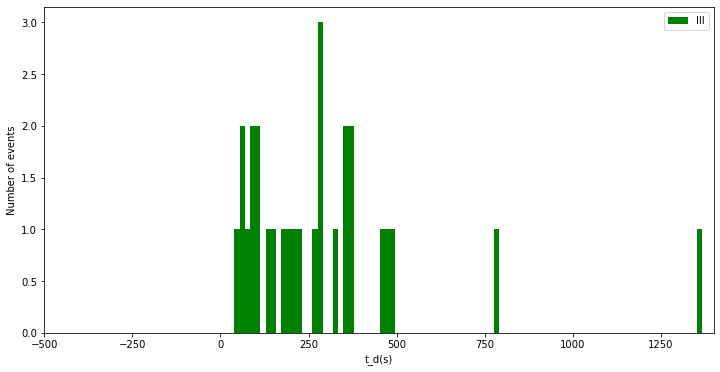

In [32]:
import pandas as pd
plt.figure(figsize=(12, 6))

#plt.hist(sheet_new_B_1[0], bins=50,label='I',color='royalblue')
#plt.hist(sheet_new_B_2[0], bins=50,label='II',color='orange')
plt.hist(sheet_new_B_3['diff_t_d'], bins=90,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-500,1400)
plt.show()

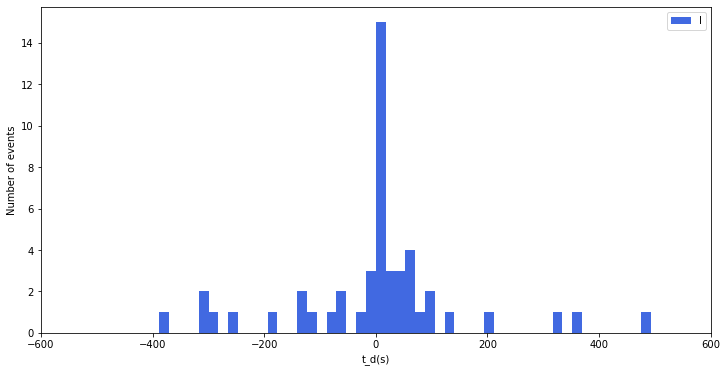

In [40]:
import pandas as pd
plt.figure(figsize=(12, 6))

#plt.hist(sheet_new_B_1[0], bins=50,label='I',color='royalblue')
#plt.hist(sheet_new_B_2[0], bins=50,label='II',color='orange')
plt.hist(sheet_new_B_1['diff_t_d'], bins=50,label='I',color='royalblue')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-600,600)
plt.show()

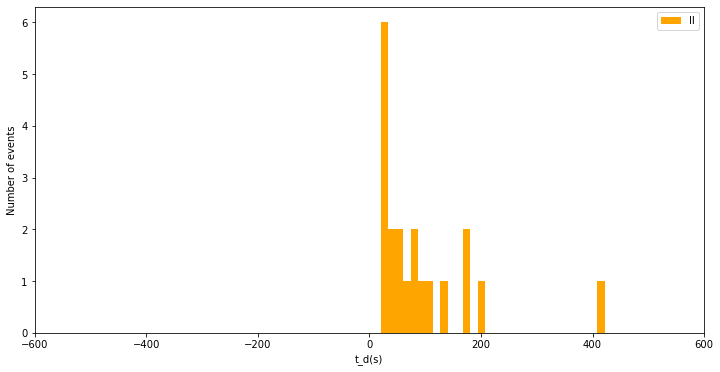

In [43]:
import pandas as pd
plt.figure(figsize=(12, 6))

#plt.hist(sheet_new_B_1[0], bins=50,label='I',color='royalblue')
#plt.hist(sheet_new_B_2[0], bins=50,label='II',color='orange')
plt.hist(sheet_new_B_2['diff_t_d'], bins=30,label='II',color='orange')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-600,600)
plt.show()

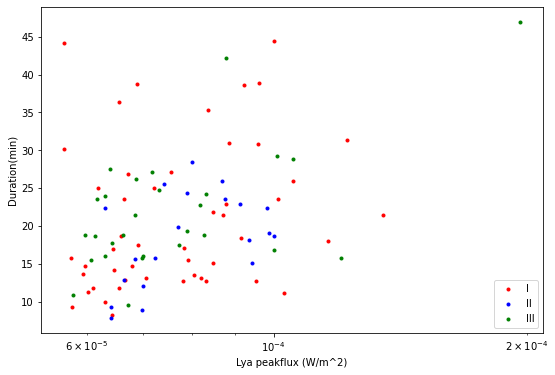

In [22]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
#plt.xlim(10**(-5),10**(-2))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['SUB'],sheet_new_B_1['DUR(m)'],'r.',label = r'I')
plt.plot(sheet_new_B_2['SUB'],sheet_new_B_2['DUR(m)'],'b.',label = r'II')
plt.plot(sheet_new_B_3['SUB'],sheet_new_B_3['DUR(m)'],'g.',label = r'III')
plt.xlabel(r'Lya peakflux (W/m^2)')
plt.ylabel(r'Duration(min)')
plt.legend() #图例

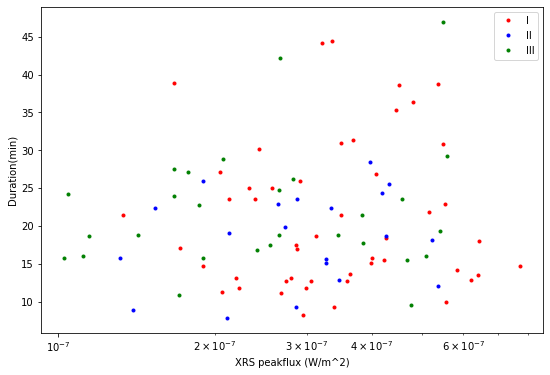

In [13]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
#plt.xlim(10**(-5),10**(-2))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['x_sub'],sheet_new_B_1['DUR(m)'],'r.',label = r'I')
plt.plot(sheet_new_B_2['x_sub'],sheet_new_B_2['DUR(m)'],'b.',label = r'II')
plt.plot(sheet_new_B_3['x_sub'],sheet_new_B_3['DUR(m)'],'g.',label = r'III')
plt.xlabel(r'XRS peakflux (W/m^2)')
plt.ylabel(r'Duration(min)')
plt.legend() #图例

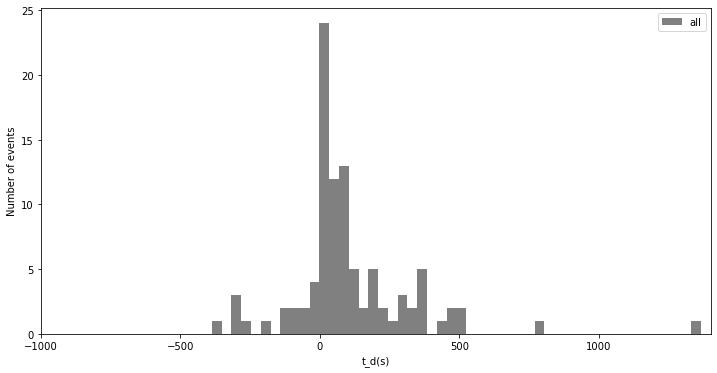

In [67]:
import pandas as pd
plt.figure(figsize=(12, 6))

a=plt.hist(sheet_lya_time_new['diff_t_d'], bins=50,label='all',color='gray')
#plt.hist(sheet_new_B_2[0], bins=40,label='II',color='orange')
#plt.hist(sheet_new_B_3[0], bins=2,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-1000,1400)
plt.show()

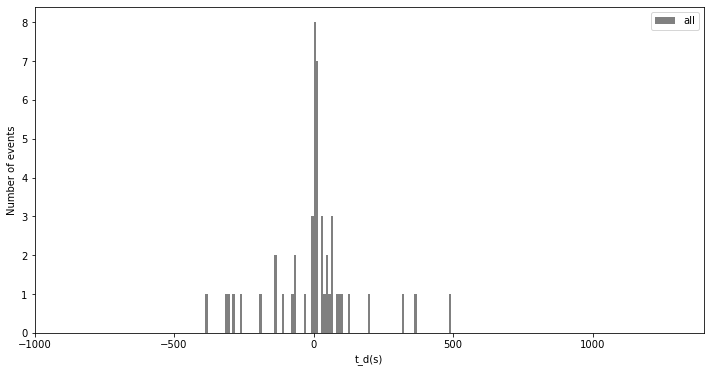

0.7346938775510204


In [21]:


import pandas as pd
plt.figure(figsize=(12, 6))

a=plt.hist(sheet_new_B_1['diff_t_d'], bins=100,label='all',color='gray')
#plt.hist(sheet_new_B_2[0], bins=40,label='II',color='orange')
#plt.hist(sheet_new_B_3[0], bins=2,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-1000,1400)
plt.show()




list_N=[]
for i in range(len(a[1])):
    if(a[1][i]>=-120 and a[1][i]<=120):
        list_N.append(a[0][i])
p=np.sum(list_N)/len(sheet_new_B_1)
print(p)

In [93]:
len(a[1])

51

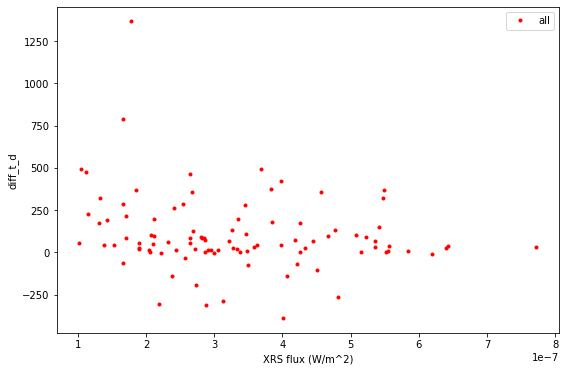

In [15]:
plt.figure(figsize=(9, 6))
plt.plot(sheet_lya_time_new['x_sub'],sheet_lya_time_new['diff_t_d'],'r.',label = r'all')
plt.xlabel(r'XRS flux (W/m^2)')
plt.ylabel(r'diff_t_d')
plt.legend() #图例

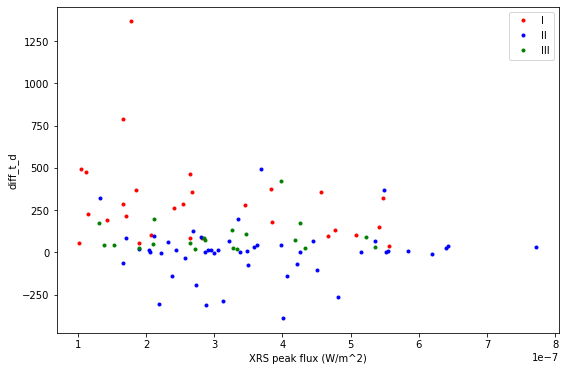

In [56]:
plt.figure(figsize=(9, 6))
#plt.xscale('log')
#plt.xlim(10**(-5),10**(-2))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['x_sub'],sheet_new_B_1['diff_t_d'],'r.',label = r'I')
plt.plot(sheet_new_B_2['x_sub'],sheet_new_B_2['diff_t_d'],'b.',label = r'II')
plt.plot(sheet_new_B_3['x_sub'],sheet_new_B_3['diff_t_d'],'g.',label = r'III')
plt.xlabel(r'XRS peak flux (W/m^2)')
plt.ylabel(r'diff_t_d')
plt.legend() #图例

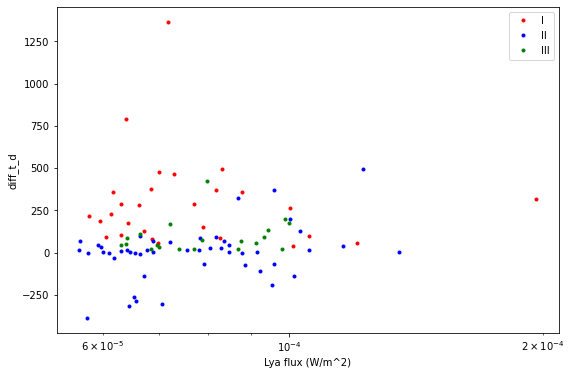

In [53]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
#plt.xlim(10**(-5),10**(-2))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['SUB'],sheet_new_B_1['diff_t_d'],'r.',label = r'I')
plt.plot(sheet_new_B_2['SUB'],sheet_new_B_2['diff_t_d'],'b.',label = r'II')
plt.plot(sheet_new_B_3['SUB'],sheet_new_B_3['diff_t_d'],'g.',label = r'III')
plt.xlabel(r'Lya peakflux (W/m^2)')
plt.ylabel(r'diff_t_d')
plt.legend() #图例

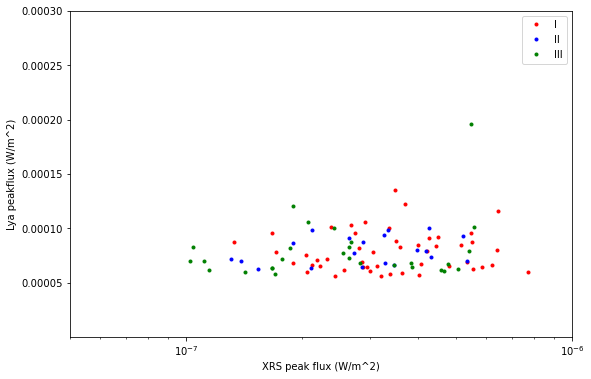

In [62]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(5*10**(-8),10**(-6))
plt.ylim(10**(-7),3*10**(-4))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['x_sub'],sheet_new_B_1['SUB'],'r.',label = r'I')
plt.plot(sheet_new_B_2['x_sub'],sheet_new_B_2['SUB'],'b.',label = r'II')
plt.plot(sheet_new_B_3['x_sub'],sheet_new_B_3['SUB'],'g.',label = r'III')
plt.xlabel(r'XRS peak flux (W/m^2)')
plt.ylabel(r'Lya peakflux (W/m^2)')
plt.legend() #图例

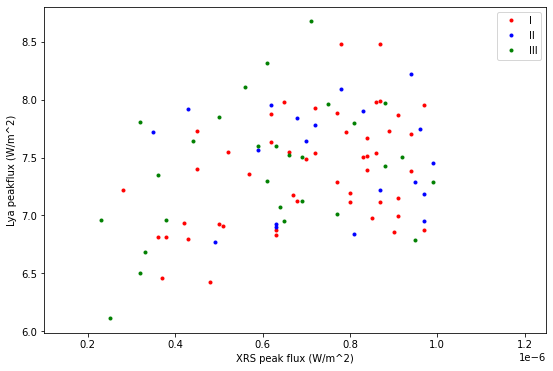

In [58]:
plt.figure(figsize=(9, 6))
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(10**(-7),1.25*10**(-6))
#plt.ylim(10**(-7),3*10**(-4))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['CLASS_N'],sheet_new_B_1['PEAKF'],'r.',label = r'I')
plt.plot(sheet_new_B_2['CLASS_N'],sheet_new_B_2['PEAKF'],'b.',label = r'II')
plt.plot(sheet_new_B_3['CLASS_N'],sheet_new_B_3['PEAKF'],'g.',label = r'III')
plt.xlabel(r'XRS peak flux (W/m^2)')
plt.ylabel(r'Lya peakflux (W/m^2)')
plt.legend() #图例

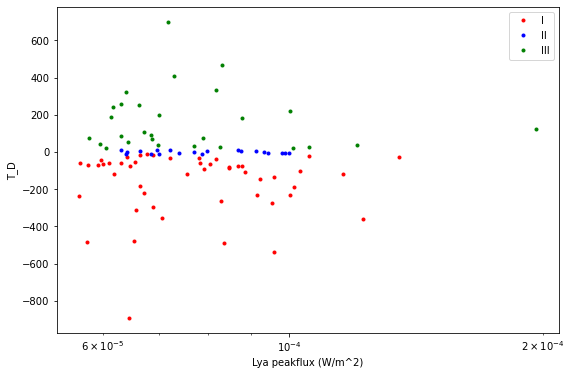

In [17]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
#plt.xlim(10**(-5),10**(-2))
#plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_B_1['SUB'],sheet_new_B_1['T_D'],'r.',label = r'I')
plt.plot(sheet_new_B_2['SUB'],sheet_new_B_2['T_D'],'b.',label = r'II')
plt.plot(sheet_new_B_3['SUB'],sheet_new_B_3['T_D'],'g.',label = r'III')
plt.xlabel(r'Lya peakflux (W/m^2)')
plt.ylabel(r'T_D')
plt.legend() #图例

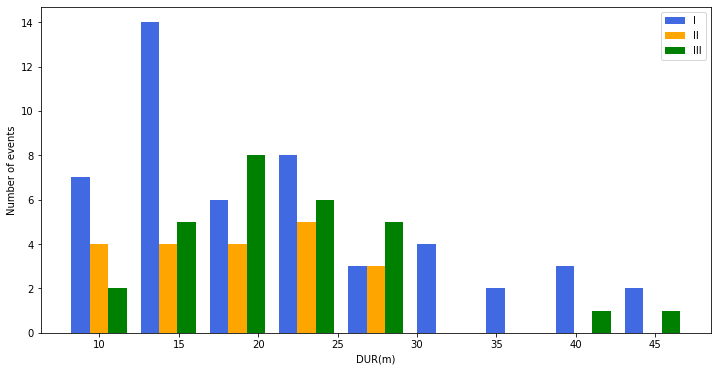

In [18]:
import pandas as pd
plt.figure(figsize=(12, 6))

plt.hist([sheet_new_B_1['DUR(m)'],sheet_new_B_2['DUR(m)'],sheet_new_B_3['DUR(m)']], bins='auto',label=['I', 'II','III'],color=['royalblue','orange','green'])
plt.xlabel('DUR(m)')
plt.ylabel('Number of events')
plt.legend() #图例

plt.show()

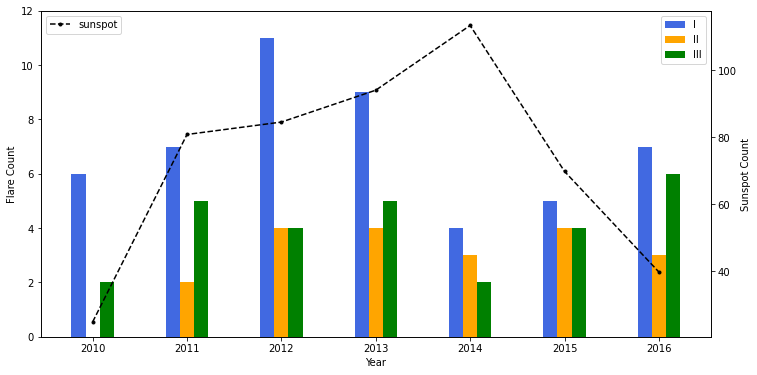

In [23]:
import pandas as pd
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
year=[2010,2011,2012,2013,2014,2015,2016]
list_year_1=[]
list_year_2=[]
list_year_3=[]

for i in year:
    a=len(sheet_new_B_1[sheet_new_B_1['YEAR'] == i])
    b=len(sheet_new_B_2[sheet_new_B_2['YEAR'] == i])
    c=len(sheet_new_B_3[sheet_new_B_3['YEAR'] == i])
    list_year_1.append(a)
    list_year_2.append(b)
    list_year_3.append(c)

width_1=0.15
ax1.bar(np.arange(len(year)),list_year_1,width_1,label="I",color='royalblue')
ax1.bar(np.arange(len(year))+width_1,list_year_2,width_1,label="II",color='orange')
ax1.bar(np.arange(len(year))+width_1*2,list_year_3,width_1,label="III",color='green')
plt.xticks(np.arange(len(year))+0.15,year);
ax1.legend(loc=1) #图例
ax1.set_ylim(0,12)
ax1.set_xlabel('Year');
ax2.set_ylabel('Sunspot Count');
ax1.set_ylabel('Flare Count');

#读取太阳黑子数据
df=pd.read_table('sunspot.txt', sep='\s+', names=['year','count1','2','3'])
ax2.plot(np.arange(len(year))+0.15,df['count1'],'.--', lw = 1.5,color='k',label="sunspot")
ax2.legend(loc=2) #图例

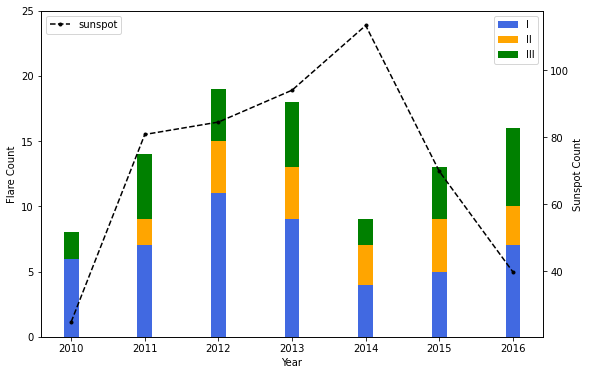

In [24]:
import pandas as pd
fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
year=[2010,2011,2012,2013,2014,2015,2016]
list_year_1=[]
list_year_2=[]
list_year_3=[]

for i in year:
    a=len(sheet_new_B_1[sheet_new_B_1['YEAR'] == i])
    b=len(sheet_new_B_2[sheet_new_B_2['YEAR'] == i])
    c=len(sheet_new_B_3[sheet_new_B_3['YEAR'] == i])
    list_year_1.append(a)
    list_year_2.append(b)
    list_year_3.append(c)

width_1=0.2
ax1.bar(np.arange(len(year)),list_year_1,width_1,bottom = 0,label="I",color='royalblue')
ax1.bar(np.arange(len(year)),list_year_2,width_1,bottom = list_year_1,label="II",color='orange')
ax1.bar(np.arange(len(year)),list_year_3,width_1,bottom = (np.array(list_year_1)+np.array(list_year_2)),label="III",color='green')
plt.xticks(np.arange(len(year)),year);

ax1.legend(loc=1) #图例
ax1.set_ylim(0,25)
ax1.set_xlabel('Year');
ax2.set_ylabel('Sunspot Count');
ax1.set_ylabel('Flare Count');

#读取太阳黑子数据
df=pd.read_table('sunspot.txt', sep='\s+', names=['year','count1','2','3'])
#这里必须用np.arange,不然报错
ax2.plot(np.arange(len(year)),df['count1'],'.--', lw = 1.5,color='k',label="sunspot")
ax2.legend(loc=2) #图例

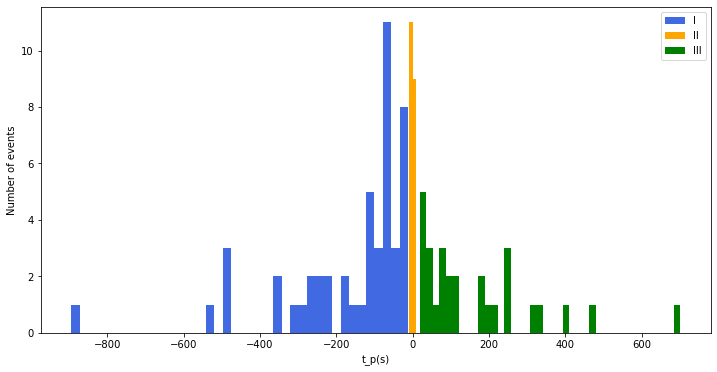

In [47]:
import pandas as pd
plt.figure(figsize=(12, 6))

plt.hist(sheet_new_B_1['T_D'], bins=40,label='I',color='royalblue')
plt.hist(sheet_new_B_2['T_D'], bins=2,label='II',color='orange')
plt.hist(sheet_new_B_3['T_D'], bins=40,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_p(s)')
plt.ylabel('Number of events')
plt.legend() #图例

plt.show()

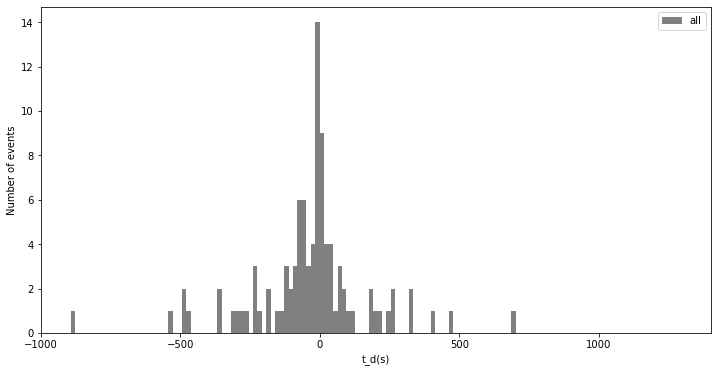

0.6494845360824743


In [22]:


import pandas as pd
plt.figure(figsize=(12, 6))

a=plt.hist(sheet_lya_time_new['T_D'], bins=100,label='all',color='gray')
#plt.hist(sheet_new_B_2[0], bins=40,label='II',color='orange')
#plt.hist(sheet_new_B_3[0], bins=2,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.xlim(-1000,1400)
plt.show()




list_N=[]
for i in range(len(a[1])):
    if(a[1][i]>=-120 and a[1][i]<=120):
        list_N.append(a[0][i])
p=np.sum(list_N)/len(sheet_lya_time_new)
print(p)

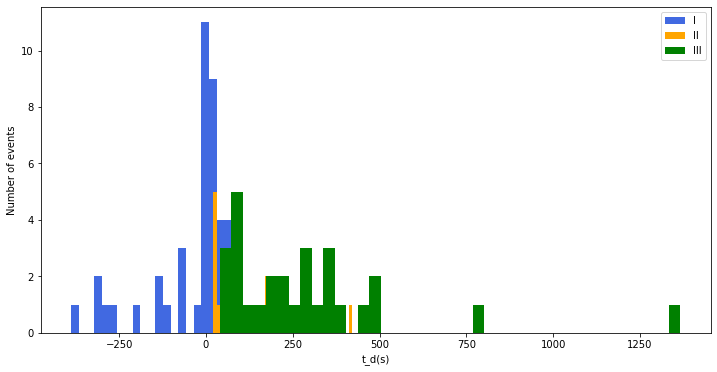

In [65]:
import pandas as pd
plt.figure(figsize=(12, 6))

plt.hist(sheet_new_B_1['diff_t_d'], bins=40,label='I',color='royalblue')
plt.hist(sheet_new_B_2['diff_t_d'], bins=40,label='II',color='orange')
plt.hist(sheet_new_B_3['diff_t_d'], bins=40,label='III',color='green')
#plt.hist([sheet_new_B_1['T_D'],sheet_new_B_2['T_D'],sheet_new_B_3['T_D']], bins='auto',label=['I', 'II','III'])
plt.xlabel('t_d(s)')
plt.ylabel('Number of events')
plt.legend() #图例

plt.show()

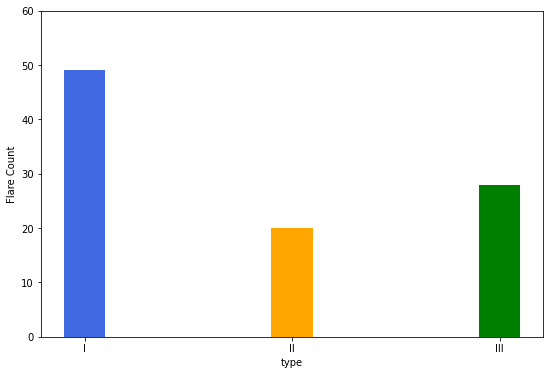

In [19]:
import pandas as pd
fig, ax1 = plt.subplots(figsize=(9,6))

#ax1.legend(loc=1) #图例
ax1.set_ylim(0,60)
ax1.set_xlabel('type');
ax1.set_ylabel('Flare Count');
list_1=[]
list_2=[]
list_3=[]

number=[1,2,3]
num_type=['I','II','III']

for i in number:
    a=len(sheet_new_B_1[sheet_new_B_1['SIGN_2'] == i])
    b=len(sheet_new_B_2[sheet_new_B_2['SIGN_2'] == i])
    c=len(sheet_new_B_3[sheet_new_B_3['SIGN_2'] == i])
    list_1.append(a)
    list_2.append(b)
    list_3.append(c)

    
#这里必须用np.arange,不然报错

width_1=0.2
ax1.bar(np.arange(len(number)),list_1,width_1,bottom = 0,color='royalblue')
ax1.bar(np.arange(len(number)),list_2,width_1,bottom = list_1,color='orange')
ax1.bar(np.arange(len(number)),list_3,width_1,bottom = (np.array(list_1)+np.array(list_2)),color='green')
plt.xticks(np.arange(len(number)),num_type);


In [66]:
sheet_new_B_1[sheet_new_B_1['SIGN_2'] == 1]

,Unnamed: 0,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,...,CLASS,SIGN,CLASS_N,SUB,CON,T_D,SIGN_2,YEAR,diff_t_d,x_sub
0,0,1,2010-04-09,04:44:11,04:51:07,05:28:35,44.4,6.3596,6.4597,6.2006,...,B3.7,1,3.700000e-07,0.000100,1.015740,-233,1,2010,196.000,3.355164e-07
2,2,11,2010-07-31,05:24:46,05:28:03,05:36:37,11.8,6.3626,6.4236,6.3290,...,B4.8,1,4.800000e-07,0.000061,1.009587,-57,1,2010,-4.000,2.992420e-07
3,3,30,2010-10-19,13:17:46,13:22:51,13:31:26,13.7,6.8444,6.9131,6.8538,...,B5.1,1,5.100000e-07,0.000059,1.008652,-69,1,2010,45.645,3.626000e-07
4,4,31,2010-10-23,17:27:09,17:33:09,17:57:23,30.2,6.7022,6.8117,6.7554,...,B3.6,1,3.600000e-07,0.000056,1.008334,-236,1,2010,15.113,2.434000e-07
5,5,33,2010-10-26,03:13:04,03:15:03,03:57:19,44.2,6.7787,6.8351,6.6911,...,B6.3,1,6.300000e-07,0.000056,1.008320,-57,1,2010,68.427,3.209300e-07
6,6,39,2010-11-10,16:33:01,16:38:17,16:47:46,14.7,6.7829,6.8552,6.7955,...,B9.0,1,9.000000e-07,0.000060,1.008785,-43,1,2010,30.793,7.716200e-07
10,10,70,2011-02-11,21:40:18,21:42:06,21:57:13,16.9,6.8625,6.9302,6.8658,...,B5.0,1,5.000000e-07,0.000064,1.009380,-894,1,2011,-313.250,2.876800e-07
13,13,160,2011-03-29,00:28:33,00:30:34,00:43:40,15.1,7.4558,7.5406,7.4395,...,B8.6,1,8.600000e-07,0.000085,1.011374,-86,1,2011,44.070,3.984700e-07
16,16,202,2011-06-16,23:09:52,23:14:57,23:20:58,11.1,6.7654,6.8784,6.7754,...,B6.3,1,6.300000e-07,0.000103,1.015202,-103,1,2011,127.586,2.681600e-07
18,18,240,2011-09-07,18:22:42,18:26:52,18:31:59,9.3,7.0585,7.1534,7.0958,...,B9.1,1,9.100000e-07,0.000058,1.008117,-68,1,2011,0.500,3.383000e-07
